In [87]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

Some constant variables. Change them here:

In [173]:
PRISIONERS = 100
RUNS = 10000
BOXES_TO_OPEN = int(PRISIONERS / 2)
verbosity = False

Get a list from 1 to 100 in a random order without repetition for the number of the box and another for the number in the paper

In [20]:
boxes = []
for box in range(1,PRISIONERS+1):
    boxes.append(box)
random.shuffle(boxes)

In [21]:
papers = []
for paper in range(1,PRISIONERS+1):
    papers.append(paper)
random.shuffle(papers)

Make a dict containing the number of the box as key and the number of the paper as value

In [22]:
box_paper = {}
for num in range(len(boxes)):
    box_paper[boxes[num]] = papers[num]

In [23]:
len(box_paper)

1000

Now each prisioner opens the half of the boxes starting by the box with his number and then the box with the number written in the paper

In [24]:
results = []
for prisioner in range(1, PRISIONERS+1):
    next_box = box_paper[prisioner]
    if verbosity:
        print("Prisioner ", prisioner, " starts opening his box and it found a paper with number ", next_box)
    opened = 1
    while (opened<=BOXES_TO_OPEN and next_box!=prisioner):
        if verbosity:
            print("next box to open", next_box)
        next_box = box_paper[next_box]
        if verbosity:
            if (next_box == prisioner) or (opened==BOXES_TO_OPEN):
                print("all die")
        opened=opened+1
    results.append(opened)
len(results)

1000

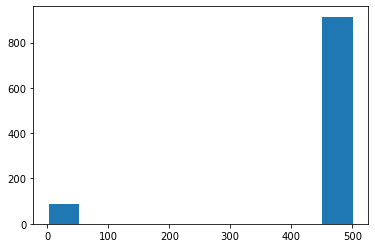

In [26]:
plt.hist(results, bins = 10)
plt.show()

In [28]:
success = 0
for res in results:
    if res<=BOXES_TO_OPEN:
        success= success+1

All together in a function to make several runs in once:

In [128]:
# Code for one run:
def riddle_prision():
    boxes = []
    for box in range(1,PRISIONERS+1):
        boxes.append(box)
    random.shuffle(boxes)
    
    papers = boxes
    random.shuffle(papers)
    
    box_paper = {}
    for num in range(len(boxes)):
        box_paper[boxes[num]] = papers[num]
        
    opened_boxes = []
    for prisioner in range(1, PRISIONERS+1):
        next_box = box_paper[prisioner]
        if verbosity:
            print("Prisioner ", prisioner, " starts opening his box and it found a paper with number ", next_box)
        opened = 1
        while (opened<=BOXES_TO_OPEN and next_box!=prisioner):
            if verbosity:
                print("next box to open", next_box)
            next_box = box_paper[next_box]
            if verbosity:
                if (next_box == prisioner) or (opened==BOXES_TO_OPEN):
                    print("all die")
            opened=opened+1
        opened_boxes.append(opened)
        
    for prisioner_open_boxes in opened_boxes:
        if prisioner_open_boxes>BOXES_TO_OPEN:
            return 0
    return 1

In [ ]:
### What if the same prisioners open 50 random boxes?

In [176]:
def random_50_boxes():
    boxes = []
    for box in range(1,PRISIONERS+1):
        boxes.append(box)
    random.shuffle(boxes)
    
    papers = boxes
    random.shuffle(papers)
    
    box_paper = {}
    for num in range(len(boxes)):
        box_paper[boxes[num]] = papers[num]
        
    choices = boxes
    random.shuffle(choices)
    choices = choices[BOXES_TO_OPEN:]
    
    for prisioner in range(1, PRISIONERS+1):
        if prisioner not in choices:
            return 0
    print ("success")
    return 1

In [177]:
## Both examples

In [178]:
print("PRISIONERS: ", PRISIONERS, " , RUNS: ", RUNS)

success_total = 0
for run in range(RUNS):
    success_total = success_total + riddle_prision()
print ("Using the num of the paper: ", success_total, success_total/RUNS*100,"%")

success_total_random = 0
for run in range(RUNS):
    success_total_random = success_total_random + random_50_boxes()
print ("Opening random boxes: ", success_total_random, success_total_random/RUNS*100,"%")

PRISIONERS:  100  , RUNS:  10000
Using the num of the paper:  3096 30.959999999999997 %
Opening random boxes:  0 0.0 %
